# Creating a Driven Control

This notebook illustrates how to use Q-CTRL Open Controls to create a driven control.

A driven control represents the physical implementation of a quantum gate and is specified via one more multiple sets of rotation angles and phases with finite durations. Primitive driven controls only consist of one set and implement the desired gate directly, whereas dynamically corrected gates (DCGs) require driven controls made up of multiple segments. DCGs can be used as drop-in replacements to actively suppress errors in quantum circuits and improve the overall gate fidelity.

Q-CTRL Open Controls can be used to create a driven control from a library of well-known control schemes. Once created, it can be printed, plotted, exported in CSV or JSON format for use on a quantum computer or any of [Q-CTRL's products](https://q-ctrl.com/products/).

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from qctrlopencontrols import new_predefined_driven_control, DrivenControls

## Predefined Driven Control Schemes

Q-CTRL Open Controls can create driven controls according to the following protocols:

1. Primitive
2. First-order Wimperis broadband (BB1)
3. First-order Solovay-Kitaev (SK1)
4. Compensating for Off-Resonance with a Pulse Sequence (CORPSE)
5. First-order Walsh Amplitude-Modulated Filter (WAMF1)
6. Short Composite Rotation for Undoing Length Over and Under Shoot (SCROFULOUS)
7. COPRSE in BB1
8. CORPSE in SK1
9. CORPSE in SCROFULOUS

See the [technical documentation](https://docs.q-ctrl.com/control-library) for details.

## Creating and Printing a Driven Control

A driven control is defined as one or multiple sets of unitary operations, each initialized with by a `rabi_rotation`, an `azimuthal_angle` and a `maximum_rabi_rate`. For some driven controls, you can optionally specify the `shape` of the control to create either square- or Gaussian-shaped controls.

From those inputs, an array of segments is derived where each segment contains the (Cartesian) driving amplitudes in x, y, and z, as well as its duration. The full mathematical description of a driven control is explained in the [technical documentation](https://docs.q-ctrl.com/control-formats#control-coordinates).

In [3]:
## Primitive Pi pulse in X
prim = new_predefined_driven_control(
    rabi_rotation=np.pi,
    azimuthal_angle=0,
    maximum_rabi_rate=2 * np.pi,
    shape='square',
    scheme='primitive',
    name='Primitive X-pi'
)
print(prim)

Primitive X-pi:
X Amplitudes: [+2] x pi
Y Amplitudes: [+0] x pi
Z Amplitudes: [+0] x pi
Durations:    [+1] x 0.5s


In [4]:
## BB1 Pi pulse in X (implements the same effective operation as above)
bb1_x = new_predefined_driven_control(
    rabi_rotation=np.pi,
    azimuthal_angle=0,
    maximum_rabi_rate=2 * np.pi,
    scheme='wimperis_1',
    name='BB1 X-pi'
)
print(bb1_x)

BB1 X-pi:
X Amplitudes: [+2, -0.5, +1.375, -0.5] x pi
Y Amplitudes: [+0, +1.936, -1.452, +1.936] x pi
Z Amplitudes: [+0, +0, +0, +0] x pi
Durations:    [+0.2,+0.2,+0.4,+0.2] x 2.5s


In [5]:
## BB1 Pi/2 pulse in Y
bb1_y = new_predefined_driven_control(
    rabi_rotation=np.pi/2,
    azimuthal_angle=np.pi/2,
    maximum_rabi_rate=2 * np.pi,
    scheme='wimperis_1',
    name='BB1 Y-pi/2'
)
print(bb1_y)

BB1 Y-pi/2:
X Amplitudes: [+0, -1.984, +1.86, -1.984] x pi
Y Amplitudes: [+2, -0.25, +0.734, -0.25] x pi
Z Amplitudes: [+0, +0, +0, +0] x pi
Durations:    [+0.111,+0.222,+0.444,+0.222] x 2.25s


In [6]:
## SK1 Pi/2 pulse in Y
sk1 = new_predefined_driven_control(
    rabi_rotation=np.pi/2,
    azimuthal_angle=np.pi/2,
    maximum_rabi_rate=2 * np.pi,
    scheme='solovay_kitaev_1',
    name='SK1 Y-pi/2'
)
print(sk1)

SK1 Y-pi/2:
X Amplitudes: [+0, +1.984, -1.984] x pi
Y Amplitudes: [+2, -0.25, -0.25] x pi
Z Amplitudes: [+0, +0, +0] x pi
Durations:    [+0.111,+0.444,+0.444] x 2.25s


In [7]:
## CORPSE Pi/2 pulse in X
corpse = new_predefined_driven_control(
    rabi_rotation=np.pi/2,
    azimuthal_angle=0,
    maximum_rabi_rate=2 * np.pi,
    scheme='compensating_for_off_resonance_with_a_pulse_sequence',
    name='CORPSE X-pi/2'
)
print(corpse)

CORPSE X-pi/2:
X Amplitudes: [+2, -2, +2] x pi
Y Amplitudes: [+0, +0, +0] x pi
Z Amplitudes: [+0, +0, +0] x pi
Durations:    [+0.528,+0.438,+0.033] x 2.0199465438373845s


### Plotting a driven control

Once created, Q-CTRL Open Controls provides the method `get_plot_formatted_arrays` to create a set of formatted arrays ready to be immediately plotted with Matplotlib. We use the `wimperis_1` (BB1) as a driven control to generate plots of the `x_amplitudes`, `y_amplitudes` and `z_amplitudes`.

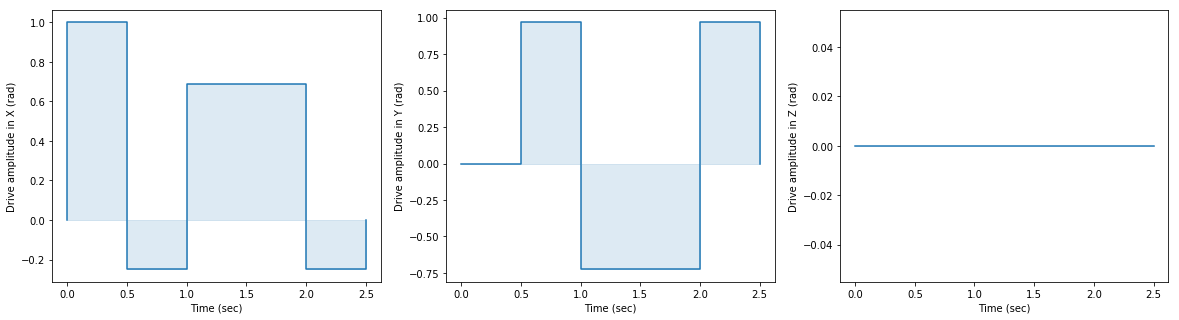

In [8]:
formatted_plot_data = bb1_x.get_plot_formatted_arrays()
x_amplitudes, y_amplitudes, z_amplitudes, times = (formatted_plot_data['x_amplitudes'],
                                                   formatted_plot_data['y_amplitudes'],
                                                   formatted_plot_data['z_amplitudes'],
                                                   formatted_plot_data['times'])
# prepare the axes
figure, (x_axis, y_axis, z_axis) = plt.subplots(1, 3, figsize=(20,5))

x_axis.fill_between(times, x_amplitudes, 0, alpha=0.15, color='C0')
x_axis.plot(times, x_amplitudes)
x_axis.set_xlabel('Time (sec)')
x_axis.set_ylabel('Drive amplitude in X (rad)')

y_axis.fill_between(times, y_amplitudes, 0, alpha=0.15, color='C0')
y_axis.plot(times, y_amplitudes)
y_axis.set_xlabel('Time (sec)')
y_axis.set_ylabel('Drive amplitude in Y (rad)')

z_axis.fill_between(times, z_amplitudes, 0, alpha=0.15, color='C0')
z_axis.plot(times, z_amplitudes)
z_axis.set_xlabel('Time (sec)')
z_axis.set_ylabel('Drive amplitude in Z (rad)')

plt.show()

### Exporting the Driven Control

Q-CTRL Open Controls enables exporting driven controls in CSV or JSON format. An exported driven control is [formatted](https://docs.q-ctrl.com/control-formats) to be compatible with [Q-CTRL BLACK OPAL](https://app.q-ctrl.com).

Q-CTRL Open Controls can export a driven control in either `cartesian` or `cylindrical` coordinates. For details, consult the [technical documentation](https://docs.q-ctrl.com/output-data-formats#q-ctrl-hardware).

In the example below, we chose the `bb1_x` control (created above) for exporting to a CSV file.

In [27]:
file_type='CSV'
filename='example_driven_control.csv'

bb1_x.export_to_file(
    filename=filename, 
    file_type=file_type,
    coordinates='cartesian')

In [28]:
## Reload the file and check its content to better understand the format
with open(filename, 'rt') as handle:
    file_content = handle.readlines()
for line in file_content:
    print(line)

amplitude_x,amplitude_y,detuning,duration,maximum_rabi_rate

1.0,0.0,0.0,0.5,6.283185307179586

-0.2500000000000001,0.9682458365518541,0.0,0.5,6.283185307179586

0.6875000000000002,-0.7261843774138904,0.0,1.0,6.283185307179586

-0.2500000000000001,0.9682458365518541,0.0,0.5,6.283185307179586


### Opening the Exported Sequence in Q-CTRL BLACK OPAL

The exported CSV files are compatible for analysis by a suite of tools offered by [Q-CTRL BLACK OPAL](https://app.q-ctrl.com). For example, you can upload the exported file in the [1-QUBIT Workspace](https://app.q-ctrl.com/oneQubit) for further analysis. The process to upload a custom control is described in [Uploading and Evaluating Custom Controls](https://help.q-ctrl.com/black-opal/guides/uploading-and-evaluating-custom-controls). For a full capability of BLACK OPAL, consult [Q-CTRL Help](https://help.q-ctrl.com/black-opal)

## Custom Definition of a Driven Control

`DrivenControls`, defined in Q-CTRL Open Controls, accepts a `segments` array of x, y and z amplitudes and durations to define any arbitrary Driven Control. This is the most generalized way to create any custom Driven Control.

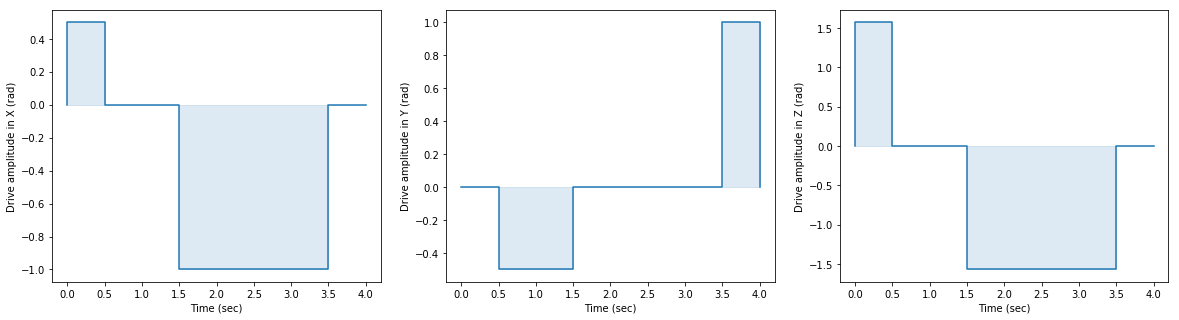

In [9]:
# defining the required parameters
x_amplitudes = [np.pi/2, 0, -np.pi, 0]
y_amplitudes = [0, -np.pi/2, 0, np.pi]
z_amplitudes = [np.pi/2, 0, -np.pi/2, 0]
durations = [0.5, 1, 2, 0.5]

_segments = np.vstack([x_amplitudes, y_amplitudes, z_amplitudes, durations]).T
_name = 'Custon Driven Control'
_shape = 'square'

custom_driven_control = DrivenControls(segments=_segments, name=_name, shape=_shape)

## let us plot and verify
formatted_plot_data = custom_driven_control.get_plot_formatted_arrays()
x_amplitudes, y_amplitudes, z_amplitudes, times = (formatted_plot_data['x_amplitudes'],
                                                   formatted_plot_data['y_amplitudes'],
                                                   formatted_plot_data['z_amplitudes'],
                                                   formatted_plot_data['times'])
# prepare the axes
figure, (x_axis, y_axis, z_axis) = plt.subplots(1, 3, figsize=(20,5))

x_axis.fill_between(times, x_amplitudes, 0, alpha=0.15, color='C0')
x_axis.plot(times, x_amplitudes)
x_axis.set_xlabel('Time (sec)')
x_axis.set_ylabel('Drive amplitude in X (rad)')

y_axis.fill_between(times, y_amplitudes, 0, alpha=0.15, color='C0')
y_axis.plot(times, y_amplitudes)
y_axis.set_xlabel('Time (sec)')
y_axis.set_ylabel('Drive amplitude in Y (rad)')

z_axis.fill_between(times, z_amplitudes, 0, alpha=0.15, color='C0')
z_axis.plot(times, z_amplitudes)
z_axis.set_xlabel('Time (sec)')
z_axis.set_ylabel('Drive amplitude in Z (rad)')

plt.show()